In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

SVM is a supervised ML algorithm that works by mapping data to high-diemnsional feature space so taht data points can be categorized, this can be done by kernel function of SVM classfier. A separator between the categories are found and then the data is transformed in such a way that a separator could be drawn as hyperplane. 

###row = record 
###column = attribute/ dimension
###target column = prediction

In [15]:
cell_df = pd.read_csv('desktop/cell_samples.csv')

In order to see first 5 rows of the data or last 5 rows we can use head or tail: 

In [16]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [18]:
cell_df.shape

(699, 11)

In [21]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [23]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

There is value 2 which is occured 458 in Class column
and there value 4 which si occured 241 in Class column so from total values of 699 the 458 belongs to value 2 (there are two types of class )

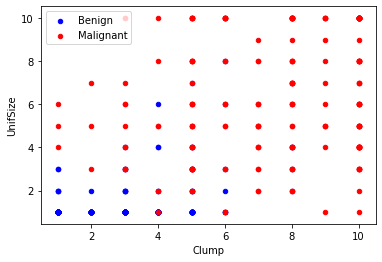

In [27]:
malignant_df = cell_df [cell_df['Class']== 4][0:200]
benign_df = cell_df [cell_df['Class']== 2][0:200]
axes= benign_df.plot(kind='scatter', x= 'Clump', y= 'UnifSize', color='blue', label= 'Benign')
malignant_df.plot(kind='scatter', x= 'Clump', y= 'UnifSize', color='red', label= 'Malignant', ax=axes)

In [28]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

We need to do some modification on column BareNuc since the type is object and we can not do matehmatical oeprations. 

In [37]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
#assued this tspe is converted into given type like here we need to covner BareNuc type from object to int so we use astype method.
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [38]:
cell_df.columns     

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [39]:
#Remove unwanted columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#cell_df lets say have 1100 rows and 11 columns, 
# select only 9 columns out of 11 since we remove ID and Class 
# X denotes independent variables so indep. v. is going to make contorution to predict dep. v.
# y denotes dependent variable

X = np.asarray(feature_df)
y=  np.asarray(cell_df['Class'])

X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [43]:
# dividing the data into train/test datasets
#Train ahs two componants x, y 
#Test also has two componant aslo x , y
# where x itself is 2D array aqnd y is 1D array
#cell_df(100)--> Train(80 rows) / Test(20 rows)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=4)

#546 * 9
X_train.shape

# 546 * 1
y_train.shape

#137*9
X_test.shape

#137*1
y_test.shape

# random_state parameter accepts a value as seed.
#seed value is a number which is used to generate other random numbers, 
#those random numbers which will be genrated with this particular seed value
# will be used to identify which all rows has to be choosen to place them as a training set and the rest of it would be considered as test data.

(137,)

Modeling of SVM with Scikit-learn    

In [46]:
#svm package has multiple method one of them is SVC. Support Vector Classifier (SVC)
#SVC referes to those data points near to the hyperplane whose distance is perpendicular to distance to hyperplane
# if sum that data points near to hyperplane and max. the dist, such point will call svc, svc is a method in svm
# kernel sees teh data from different set of  dimension so that it could easly fit in a  hyperplane
# fout trpes of kernels supported in svc (linear, Polynomial, RBF, Sigmoid) 
# for each kernel need to specify corresponding coefficient which will be used to calculating hyperplane  w.r.to new set of diemntion called gamma
# C denotes the cost that imposed on incorrectly placed datapoint w.r.to hyperplane 


from sklearn import svm 
classifier = svm.SVC(kernel ='linear', gamma = 'auto', C=2)
classifier.fit(X_train, y_train)

#simply pass testing portion and output would be one diemnsional array 
# compare y_predict vs. y_test 
# where y_test denotes the actual value of the classes of each of the record available in X_test
# y_predict is the classes predicted by the system we made out


y_predict = classifier.predict(X_test)



In [47]:
#Evaluation of the results
# this method available in the metrics package of sklearn

from sklearn.metrics import classification_report 
print (classification_report (y_test, y_predict))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [ ]:
# precision is 100% for Class 2 which is Benign 
# for Class 4 is 90% 
# precision is the ratio of true prediction so Precision = TP/ TP+ FP 
# In order to understand we need to know confusion matrix 
# F1 score is harmonic mean precision so F1= 2 x Precsion * recall / Precision + Recall and Recall = TP/TP+FN
#Support means how many instances of class 2 that is negative is there 90 and how many cases of positive cases in class 4 are there is 47 which are positive
# 90+47 =137 which is result of test datasets
